In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from yellowbrick.regressor import ResidualsPlot

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

FS_DT = pd.read_csv('../data/FS_decision_tree.csv').values.flatten()
FS_RF = pd.read_csv('../data/FS_random_forest.csv').values.flatten()

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((2342, 139), (586, 139), (2342, 1), (586, 1))

# Linear regression
Andamo ora a

In [2]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                       y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                      y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                                       y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                                      y_pred=np.exp(test_pre)))))

Train MSE: 410487023.487
Test MSE: 1182856447.045
Train R^2: 0.931
Test R^2: 0.852


Text(0, 0.5, 'Sale_Price')

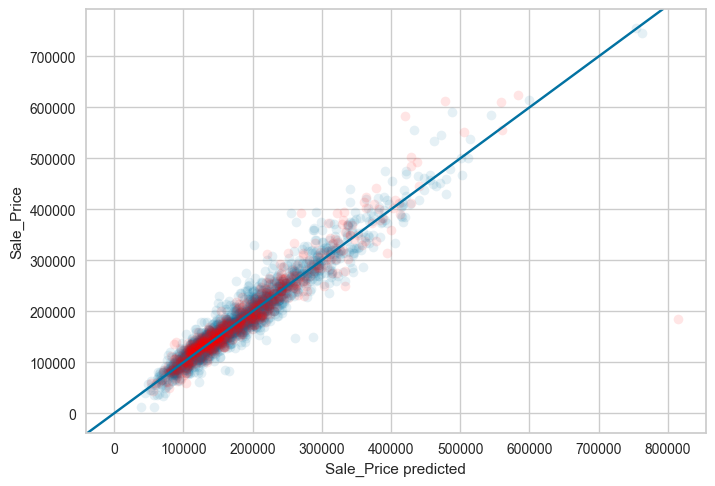

In [3]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

# Grafico dei residui

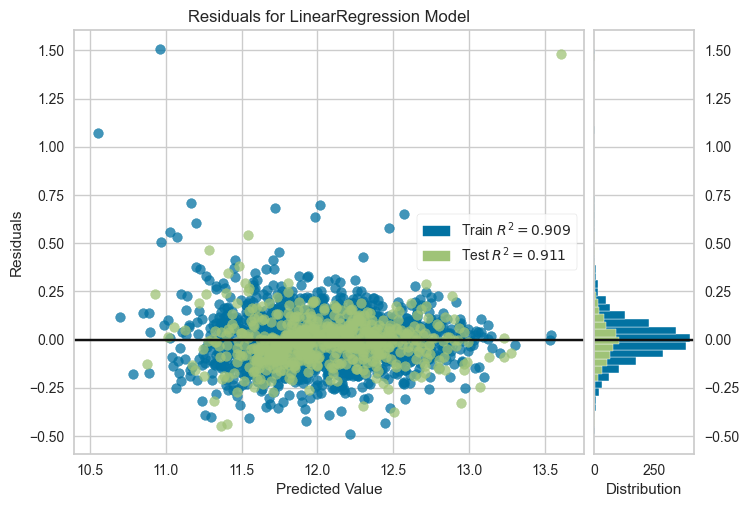

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [4]:
lr = LinearRegression()
vis = ResidualsPlot(lr)
vis.fit(X_train, Y_train)
vis.score(X_test, Y_test)
vis.show()

## Proviamo ad aumentare i gradi dell'interpolazione

In [5]:
# make pipeline: create features, then feed them to linear_reg model
degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, Y_train)

test_pre = model.predict(X_test)
train_pre = model.predict(X_train)

print("Train Error degree {:d}: {:.3f}".format(degree, (mean_squared_error(y_true=np.exp(Y_train),
                                                                           y_pred=np.exp(train_pre)))))

print("Test Error degree {:d}: {:.3f}".format(degree, (mean_squared_error(y_true=np.exp(Y_test),
                                                                          y_pred=np.exp(test_pre)))))

Train Error degree 2: 0.064
Test Error degree 2: 97060108612228596551537814329976725708815076144796455758224987112980167362910363288553643713660433031483287712398315331547262024328573356244706459394964027175439389256571081208118327662797122722895839325967345103958704128.000


overfitting!

# Kfold validation

In [6]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

lr = LinearRegression()
train_pre = cross_val_predict(lr, X_train, Y_train, cv=kf)
test_pre = cross_val_predict(lr, X_test, Y_test, cv=kf)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                       y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                      y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 465745967.071
Test MSE: 1977297056.992
Train R^2: 0.922
Test R^2: 0.753


Text(0, 0.5, 'Sale_Price')

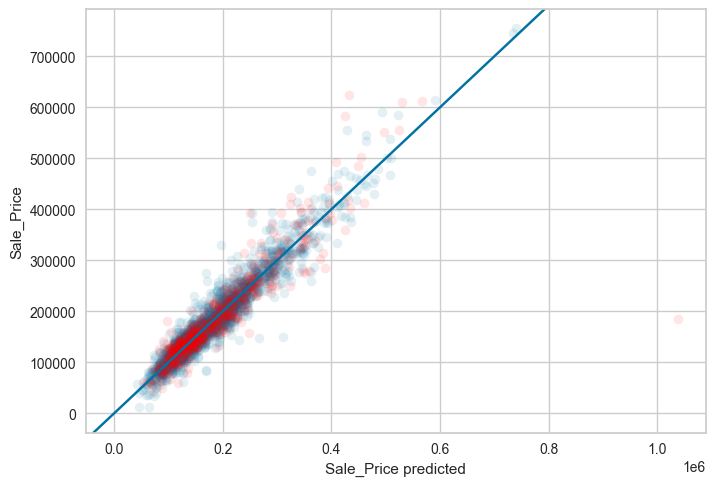

In [7]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

# Bagging

In [8]:
lr = LinearRegression()
bagged_lr = BaggingRegressor(lr, n_estimators=100)
bagged_lr.fit(X_train, Y_train.values.ravel())
test_pre = bagged_lr.predict(X_test)
train_pre = bagged_lr.predict(X_train)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 409212375.838
Test MSE: 1167523567.093
Train R^2: 0.931
Test R^2: 0.854


## Proviamo a ridurre le feature

In [9]:
lr = LinearRegression()
bagged_lr = BaggingRegressor(lr, n_estimators=100)
bagged_lr.fit(X_train[FS_DT], Y_train.values.ravel())
test_pre = bagged_lr.predict(X_test[FS_DT])
train_pre = bagged_lr.predict(X_train[FS_DT])

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 460208507.029
Test MSE: 1462301231.670
Train R^2: 0.923
Test R^2: 0.818


In [10]:
lr = LinearRegression()
bagged_lr = BaggingRegressor(lr, n_estimators=100)
bagged_lr.fit(X_train[FS_RF], Y_train.values.ravel())
test_pre = bagged_lr.predict(X_test[FS_RF])
train_pre = bagged_lr.predict(X_train[FS_RF])

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 444294785.042
Test MSE: 1266359204.972
Train R^2: 0.925
Test R^2: 0.842
